In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.ticker as mticker
import time
import csv
import zoneinfo
import matplotlib.pyplot as plt
import matplotlib.colors
import math

In [8]:
data_fn = '../data/google_reviews_weekly.csv'
df = pd.read_csv(data_fn, index_col=1)
display(df)

,category,1167638400.0,1168243200.0,1168848000.0,1169452800.0,1170057600.0,1170662400.0,1171267200.0,1171872000.0,1172476800.0,...,1627286400.0,1627891200.0,1628496000.0,1629100800.0,1629705600.0,1630310400.0,1630915200.0,1631520000.0,1632124800.0,1632729600.0
0,3D printing service,0,0,0,0,0,0,0,0,0,...,5,0,0,0,1,0,0,0,0,0
0,ATM,0,0,0,0,0,0,0,0,0,...,949,646,537,296,146,19,0,0,0,0
0,ATV dealer,0,0,0,0,0,0,0,0,0,...,42,26,21,15,18,0,0,0,0,0
0,ATV rental service,0,0,0,0,0,0,0,0,0,...,40,21,18,8,4,0,0,0,0,0
0,ATV repair shop,0,0,0,0,0,0,0,0,0,...,61,42,25,10,15,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Youth organization,0,0,0,0,0,0,0,0,0,...,52,37,27,13,11,0,0,0,0,0
0,Youth social services organization,0,0,0,0,0,0,0,0,0,...,11,2,2,0,0,0,0,0,0,0
0,Yucatan restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,Zoo,0,0,0,0,0,0,0,0,0,...,34,29,8,3,5,0,0,0,0,0


In [9]:
timeseries = df.to_numpy()
# remove columns
timeseries = timeseries[:,1:]
# remove zero rows
timeseries = timeseries[~np.all(timeseries == 0, axis=1)]

time_interval = 60*60*24*7
time_arr = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m-%d-%Y') for timestamp in df.columns[1:]])
years = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%Y') for timestamp in df.columns[1:]])
months = np.array([datetime.datetime.utcfromtimestamp(int(float(timestamp))).strftime('%m') for timestamp in df.columns[1:]])
timeseries_len = timeseries.shape[1]

categories = df['category'].to_numpy()

print(timeseries.shape)

(4569, 770)


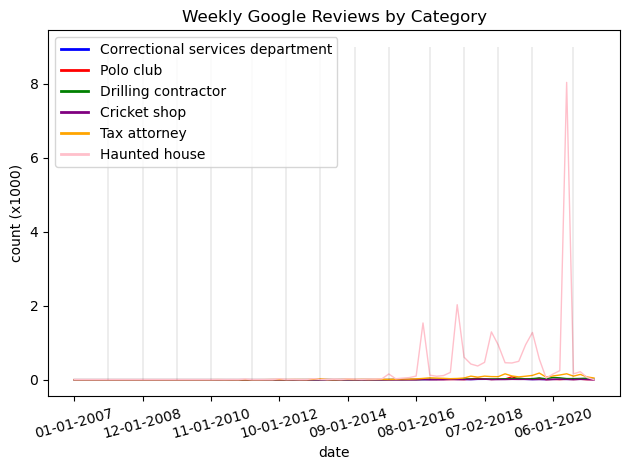

In [206]:
scale = 1000
scale_ind = 10
years_cut = years[::scale_ind]
time_arr_cut = time_arr[::scale_ind]

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel(f'count (x{scale})')
plt.title("Weekly Google Reviews by Category")

rand_ind = np.random.choice(np.arange(timeseries.shape[0]), 6, replace=False)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0],::scale_ind]/scale, c='blue', lw=1.0)
ln2, = ax.plot(timeseries[rand_ind[1],::scale_ind]/scale, c='red', lw=1.0)
ln3, = ax.plot(timeseries[rand_ind[2],::scale_ind]/scale, c='green', lw=1.0)
ln4, = ax.plot(timeseries[rand_ind[3],::scale_ind]/scale, c='purple', lw=1.0)
ln5, = ax.plot(timeseries[rand_ind[4],::scale_ind]/scale, c='orange', lw=1.0)
ln6, = ax.plot(timeseries[rand_ind[5],::scale_ind]/scale, c='pink', lw=1.0)
ax.vlines(np.where(years_cut[:-1] != years_cut[1:])[0],0,math.ceil(ax.get_ylim()[1]),colors='black', linewidth=0.1)

leg = ax.legend(categories[rand_ind], markerscale=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)

# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return time_arr_cut[int(x)]
    except IndexError:
        return ''

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()

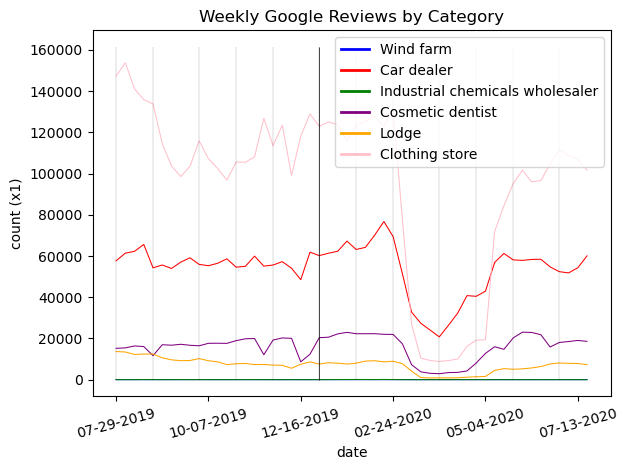

In [151]:
scale = 1

year_interval = 60*60*24*365
start_date = np.random.randint(timeseries_len//4*3,timeseries_len-year_interval//time_interval)

# make figure + axes
fig, ax = plt.subplots(tight_layout=True)
ax.set_xlabel('date')
ax.set_ylabel(f'count (x{scale})')
plt.title("Weekly Google Reviews by Category")

rand_ind = np.random.choice(np.arange(timeseries.shape[0]), 6, replace=False)
# draw one line
ln1, = ax.plot(timeseries[rand_ind[0], start_date:start_date+year_interval//time_interval]/scale, c='blue', lw=0.75)
ln2, = ax.plot(timeseries[rand_ind[1], start_date:start_date+year_interval//time_interval]/scale, c='red', lw=0.75)
ln3, = ax.plot(timeseries[rand_ind[2], start_date:start_date+year_interval//time_interval]/scale, c='green', lw=0.75)
ln4, = ax.plot(timeseries[rand_ind[3], start_date:start_date+year_interval//time_interval]/scale, c='purple', lw=0.75)
ln5, = ax.plot(timeseries[rand_ind[4], start_date:start_date+year_interval//time_interval]/scale, c='orange', lw=0.75)
ln6, = ax.plot(timeseries[rand_ind[5], start_date:start_date+year_interval//time_interval]/scale, c='pink', lw=0.75)


cut_time_arr = time_arr[start_date:start_date+year_interval//time_interval]
cut_years = years[start_date:start_date+year_interval//time_interval]
cut_months = months[start_date:start_date+year_interval//time_interval]
# helper function for the formatter
def listifed_formatter(x, pos=None):
    try:
        return cut_time_arr[int(x)]
    except IndexError:
        return ''
    
y_lim = math.ceil(ax.get_ylim()[1])
ax.vlines(np.where(cut_years[:-1] != cut_years[1:])[0],0,y_lim,colors='black', linewidth=0.5)
ax.vlines(np.where(cut_months[:-1] != cut_months[1:])[0],0,y_lim,colors='black', linewidth=0.1)
leg = ax.legend(categories[rand_ind], markerscale=1)
# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(2.0)

# make and use the formatter
mt = mticker.FuncFormatter(listifed_formatter)
ax.xaxis.set_major_formatter(mt)

# set the default ticker to only put ticks on the integers
loc = ax.xaxis.get_major_locator()
loc.set_params(integer=True)

# rotate the labels
[lab.set_rotation(15) for lab in ax.get_xticklabels()]
plt.show()